In [2]:
import os
from PIL import Image
import glob
import random
from shutil import copyfile
import csv
import pandas as pd
import numpy
from numpy import asarray
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

To achieve more samples, I rotate each image 90, 180, then 270 degrees.  Each time I rotate, I have to transform the bounding boxe coordinates.

In [3]:
rotate_path = "C:\\Users\\kaublezw\\src\\Capstone\\rotate\\rotate.py"
image_folder_path = "C:\\Users\\kaublezw\\src\\Capstone\\Data\\yolo\\full\\"

%cd $image_folder_path

files = glob.glob("*.PNG") + glob.glob("*.jpeg")

for f in files:
    for a in numpy.arange(0,360,15):
        !python "$rotate_path" -i "$f" -a $a
        



C:\Users\kaublezw\src\Capstone\Data\yolo\full


Below is logic to load all of the clover images from the files and count them.  The total # of samples is <b>22,552</b>.  The total number of 3-leaf clover samples is <b>12,524</b> and the total number of 4-leaf clover samples is <b>10,028</b>.


In [58]:
# load all of the images and labels and yolo coordinates
path = "C:\\Users\\kaublezw\\src\\Capstone\\Data\\yolo\\output\\"
clover = []
labels = []
files = glob.glob(path+'*.jpg')


for f in files:
    im = Image.open(f)
    df = pd.read_csv(f[:-4]+'.txt', delimiter=' ', header=None, names=['class','x','y','w','h'])
    for i in df.index:
      
        x = df['x'][i]
        y = df['y'][i]
        w = df['w'][i]
        h = df['h'][i]

        width, height = im.size
        left = x * width - (w*width / 2)
        top = y * height - (h * height / 2)
        bottom = top + (h * height)
        right = left + (w * width)
        
        #rotate 90,180,270
        temp = im.crop((left,top,right,bottom))
        

        image_array= asarray(temp)
        clover.append(cv2.resize(image_array, dsize=(60,60), interpolation=cv2.INTER_CUBIC))
        labels.append(df['class'][i])

print("Total count of samples", len(labels))

22552

In [63]:
c3 = list(filter(lambda x: x == 0, labels))
c4 = list(filter(lambda x: x == 1, labels))
print("total 3-leaf count:",len(c3))
print("total 4-leaf count:",len(c4))


total 3-leaf count: 12524
total 4-leaf count: 10028


The below code just pics 9 random samples and plots them to validate that I have accurately cropped the clover per their yolo bounding box coordinates

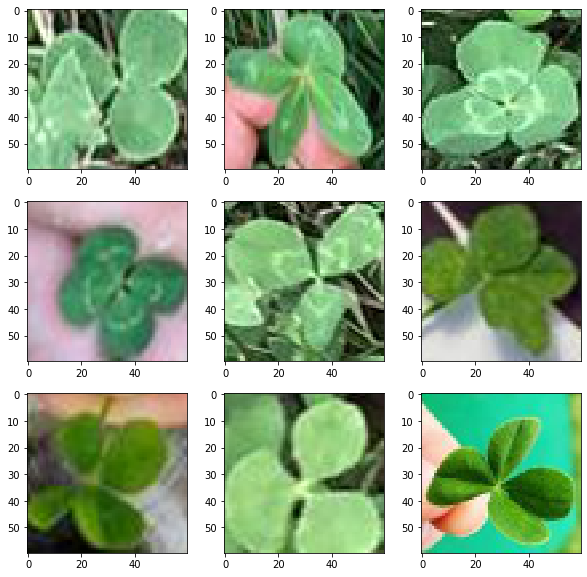

In [70]:
import random

# plot random samples of 4-leaf clovers
# plot some of the images
f, axarr = plt.subplots(3,3, figsize=(10,10))

randomsample = random.sample(clover,9)

for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(randomsample[3*i+j])

Below is a utility function to copy and then rename files in a folder.  Because I did a lot of screen capturing to grab samples off the internet, some of the filenames had conflicts.

In [52]:
import uuid
import os
import shutil
    
def renameFilesinAFolder(targetfolder):
        
    os.chdir(path)
    outputfolder = targetfolder+'output\\'

    if not os.path.isdir("output"):
        os.mkdir("output")
    else:
        shutil.rmtree("output")
        os.mkdir("output")
        
    #copy all files to the target folder
    files = files = glob.glob(targetfolder+"*.png") + glob.glob(targetfolder+"*.txt")
    for f in files:
         shutil.copy(f,targetfolder+"output")
    
    #rename all files in target folder
    os.chdir("output")
    files = glob.glob(outputfolder+"*.txt")
    for f in files:
        filename, ext = os.path.splitext(f)
    
        if (filename!=outputfolder+"classes"):
            #generate the new random name
            temp = str(uuid.uuid4().hex)
            os.rename(f,outputfolder+temp+".txt")
            os.rename(filename+".png",outputfolder+temp+".png")

    

In [53]:
renameFilesinAFolder("C:\\Users\\kaublezw\\Pictures\\Screenshots\\")

In [66]:
#split the files and make sure the class counts are near 70/30
path = "C:\\Users\\kaublezw\\src\\Capstone\\Data\\yolo\\"
files = glob.glob(path+"folder1\\*.txt") + glob.glob(path+"folder2\\*.txt") \
    + glob.glob(path+"folder3\\*.txt") + glob.glob(path+"folder4\\*.txt") \
    + glob.glob(path+"folder5\\*.txt") + glob.glob(path+"folder6\\*.txt")

train, test = train_test_split(files, test_size=.3, random_state=42)
    
df = pd.DataFrame()
for file in train:
    temp_df = pd.read_csv(file, delimiter=' ', header=None, names=['class','x','y','w','h'])
    df = df.append(temp_df)
print("training 3-leaf count:",df[(df['class']==0)]['class'].count())
print("training 4-leaf count:",df[(df['class']==1)]['class'].count())

df = pd.DataFrame()
for file in test:
    temp_df = pd.read_csv(file, delimiter=' ', header=None, names=['class','x','y','w','h'])
    df = df.append(temp_df)
print("testing 3-leaf count:",df[(df['class']==0)]['class'].count())
print("testing 4-leaf count:",df[(df['class']==1)]['class'].count())



training 3-leaf count: 8843
training 4-leaf count: 7092
testing 3-leaf count: 3681
testing 4-leaf count: 2936


In [70]:
for f in train:
    print('data/obj/'+f.split('\\')[-1].split('.')[0]+'.jpg') 

data/obj/9470bfed67134dd8af7348aab0cf5ab8.jpg
data/obj/2569e46964b34d13860daf9fd7eb2c33.jpg
data/obj/Screenshot (31)180.jpg
data/obj/11ae7894b5b54c21a3b567fdf005392b.jpg
data/obj/Screenshot (57)90.jpg
data/obj/Screenshot (49)270.jpg
data/obj/Screenshot (333)270.jpg
data/obj/7d1686819fac452ea6b5bd2410353fb1270.jpg
data/obj/4f231025217442a5aef6e635c2cb1cb3.jpg
data/obj/Screenshot (27)180.jpg
data/obj/d8114089ba144d188dda45b02fbaaf8190.jpg
data/obj/Screenshot (53)180.jpg
data/obj/cefc284832f14eefa62e9152f4678055270.jpg
data/obj/Screenshot (264)270.jpg
data/obj/Screenshot (92).jpg
data/obj/64c6e9dd9e0a4d89a46190a2390256ac90.jpg
data/obj/4878bc387677471caad4b732ffd3b22490.jpg
data/obj/f36bde4a7b4d406e80a216851511160e180.jpg
data/obj/Screenshot (236)90.jpg
data/obj/Screenshot (368)90.jpg
data/obj/Screenshot (190)90.jpg
data/obj/Screenshot (16)180.jpg
data/obj/e50ef35809ba4358ada86fb95f79c0b1270.jpg
data/obj/Screenshot (239)270.jpg
data/obj/Screenshot (233)180.jpg
data/obj/Screenshot (31).jpg

In [71]:
for f in test:
    print('data/obj/'+f.split('\\')[-1].split('.')[0]+'.jpg') 

data/obj/Screenshot (314)180.jpg
data/obj/Screenshot (310)90.jpg
data/obj/Screenshot (91)90.jpg
data/obj/Screenshot (134)270.jpg
data/obj/Screenshot (36)270.jpg
data/obj/Screenshot (192)270.jpg
data/obj/Screenshot (372)90.jpg
data/obj/Screenshot (14).jpg
data/obj/gwsgmu180.jpg
data/obj/4901feab3fe4422e9e9d8d70eb5c0d01.jpg
data/obj/Screenshot (208)180.jpg
data/obj/Screenshot (83)180.jpg
data/obj/gompgw90.jpg
data/obj/Screenshot (259)270.jpg
data/obj/Screenshot (182).jpg
data/obj/1bd7109c5ac6429ca3224f452093b6e9.jpg
data/obj/Screenshot (164)90.jpg
data/obj/4cb4b400cb384859bfb5c17601e9e745.jpg
data/obj/brgnxa.jpg
data/obj/7f13e6ef1b344b82ba702867a079d2f8180.jpg
data/obj/Screenshot (40)90.jpg
data/obj/dsquht270.jpg
data/obj/Screenshot (127)180.jpg
data/obj/Screenshot (187).jpg
data/obj/Screenshot (115)180.jpg
data/obj/Screenshot (9)180.jpg
data/obj/b1696e2852de4d648801a308742f143190.jpg
data/obj/Screenshot (150)270.jpg
data/obj/Screenshot (46)90.jpg
data/obj/Screenshot (56)90.jpg
data/obj/

In [ ]:
# convert yolo configuration to coreml configuration
path = "C:\\Users\\kaublezw\\src\\Capstone\\Data\\yolo\\"
#files = glob.glob(path+"folder1\\*.txt") + glob.glob(path+"folder2\\*.txt") \
#    + glob.glob(path+"folder3\\*.txt") + glob.glob(path+"folder4\\*.txt") \
#    + glob.glob(path+"folder5\\*.txt") + glob.glob(path+"folder6\\*.txt")

files = glob.glob(path+"rotated\\*.txt")

for file in files:
    main = {}

    df = pd.read_csv(file, delimiter=' ', header=None, names=['class','x','y','w','h'])
    main['image'] = file.split('\\')[-1].split('.')[0]+'.jpg'
    
    # load image and get its resolution
    im = Image.open(file.split('.')[0]+'.jpg')
    width, height = im.size
    im.close()
    
    annotations = []
    for i,row in df.iterrows():
        annotation ={}
        coordinate = {}
        
        annotation['label'] = "3Clover" if row['class']==0 else "4Clover"
        coordinates['x'] = width * row['x']
        coordinates['y'] = height * row['y']
        coordinates['width'] = width* row['w']
        coordinates['height'] = height * row['h']
        annotation['coordinates'] = coordinates    
        annotations.append(annotation)   
            
    main['annotations'] = annotations

In [8]:
main

{'image': 'Screenshot (373)90.jpg'}